In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [33]:
# Load the dataset
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [34]:

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df

<ipython-input-34-8b95e6a0f535>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [35]:
# Convert Store column to dummy variables
store_dummies = pd.get_dummies(df['Store'], prefix='Store')

# Concatenate the original dataframe with the store dummies
df1 = pd.concat([df, store_dummies], axis=1)



# Convert Month column to dummy variables
month_dummies = pd.get_dummies(df1['month'], prefix='month')

# Concatenate the original dataframe with the month dummies
df1 = pd.concat([df1, month_dummies], axis=1)
# Drop the original Month column
df1 = df1.drop('month', axis=1)
# Drop the original Store column
df1 = df1.drop('Store', axis=1)
df1

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,day,Store_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,1,...,0,0,1,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,1,...,0,0,0,0,0,0,0,0,0,1
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,19,1,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,26,1,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,28,0,...,0,0,0,0,0,0,1,0,0,0
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,0,...,0,0,1,0,0,0,0,0,0,0
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,0,...,0,0,0,0,0,0,0,0,0,1
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,19,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   year          6435 non-null   int64         
 9   month         6435 non-null   int64         
 10  day           6435 non-null   int64         
 11  Store_1       6435 non-null   uint8         
 12  Store_2       6435 non-null   uint8         
 13  Store_3       6435 non-null   uint8         
 14  Store_4       6435 non-null   uint8         
 15  Store_5       6435 non-null   uint8   

In [ ]:
# Drop the original Month column
df1 = df.drop('month', axis=1)
# Drop the original Store column
df1 = df.drop('Store', axis=1)

In [ ]:
# Explore the dataset
print(df.head()) # View the first few rows
print(df.info()) # View the column data types and count of non-null values

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  year  month  day  
0  211.096358         8.106  2010      5    2  
1  211.242170         8.106  2010     12    2  
2  211.289143         8.106  2010      2   19  
3  211.319643         8.106  2010      2   26  
4  211.350143         8.106  2010      5    3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64        

In [ ]:
print(df.describe()) # View the summary statistics of numerical columns

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         year        month          day  
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000  
mean    171.578394      7.999151  2010.965035     6.475524    15.650350  
std      39.356712      1.875885     0.797019     3.321797     8.753908  
min     126.064000 

In [ ]:
# Check for missing data
print(df.isnull().sum()) # View the count of missing values in each column

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64


In [ ]:
# Check for duplicates
print(df.duplicated().sum()) # View the count of duplicate rows

0


In [ ]:
# Address missing data and duplicates
df.drop_duplicates(inplace=True) # Remove duplicate rows
df.dropna(inplace=True) # Remove rows with missing values

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'Holiday_Flag'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>, <Axes: >]], dtype=object)

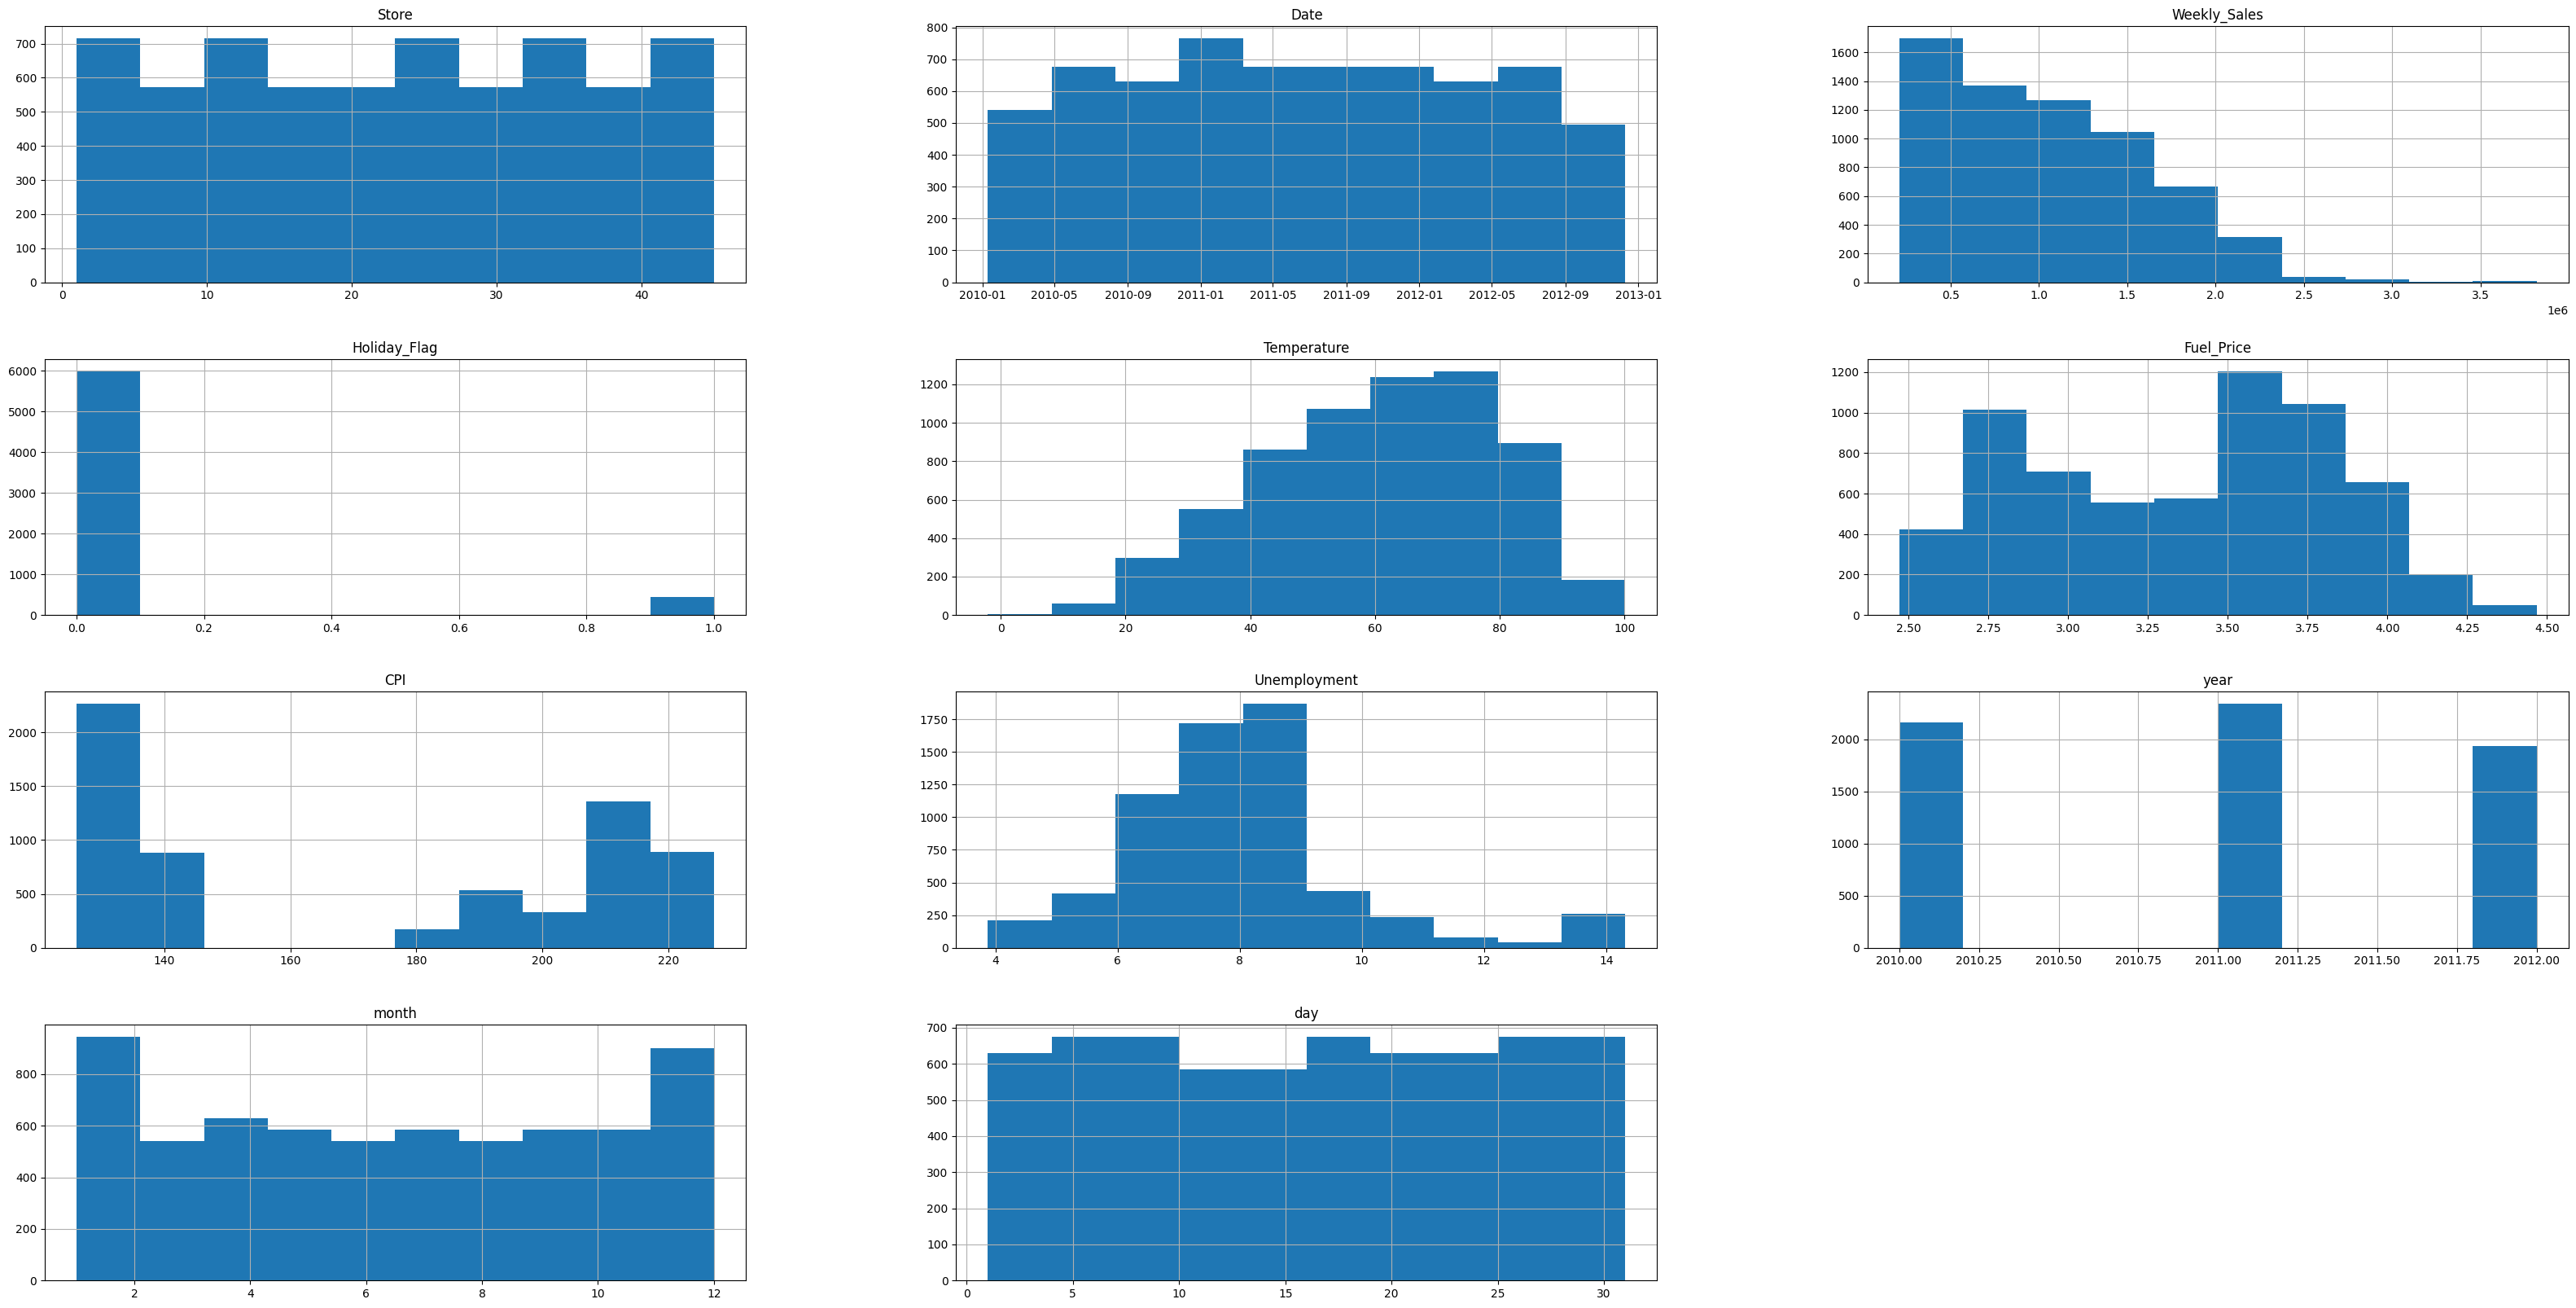

In [ ]:
df.hist(figsize=(40,20))

In [ ]:
g = sns.PairGrid(df, hue="Weekly_Sales")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
# Remove outliers using the z-score method
z_scores = zscore(df['Weekly_Sales'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


<ipython-input-65-ec89f25669e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # Compute the correlation matrix


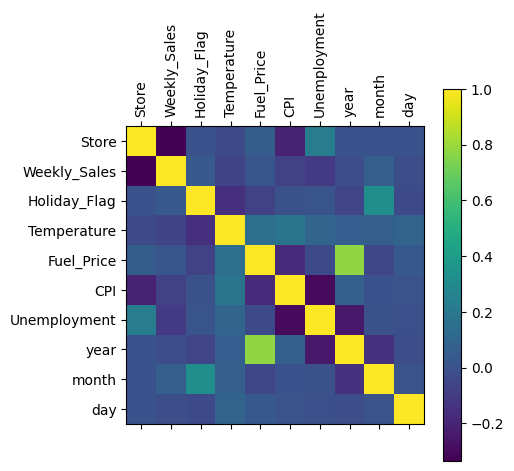

In [65]:
# Explore relationships and patterns
corr = df.corr() # Compute the correlation matrix
plt.matshow(corr) # Plot the correlation matrix as a heatmap
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

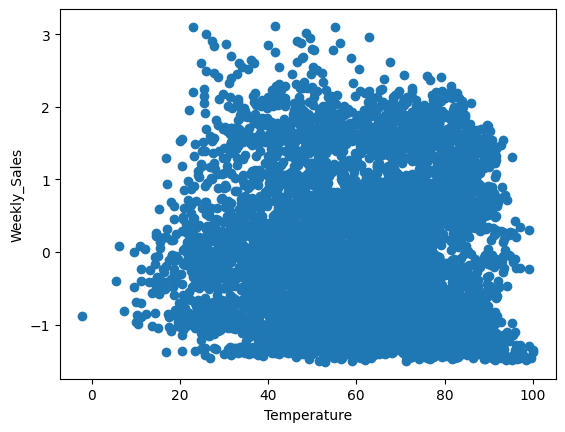

In [ ]:
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

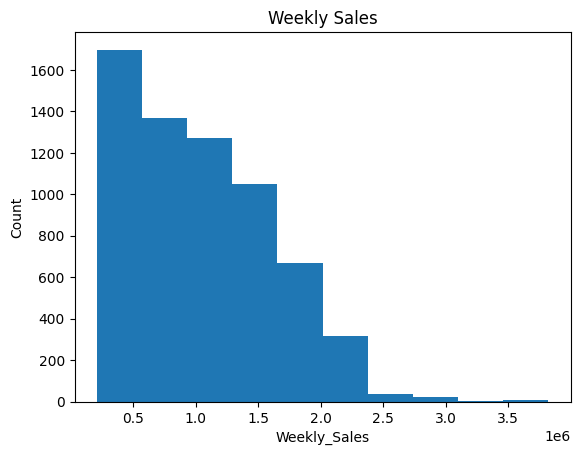

In [79]:
plt.hist(df['Weekly_Sales'])
plt.xlabel('Weekly_Sales')
plt.ylabel('Count')
plt.title('Weekly Sales')
plt.show()

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Holiday_Flag'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >, <Axes: >]],
      dtype=object)

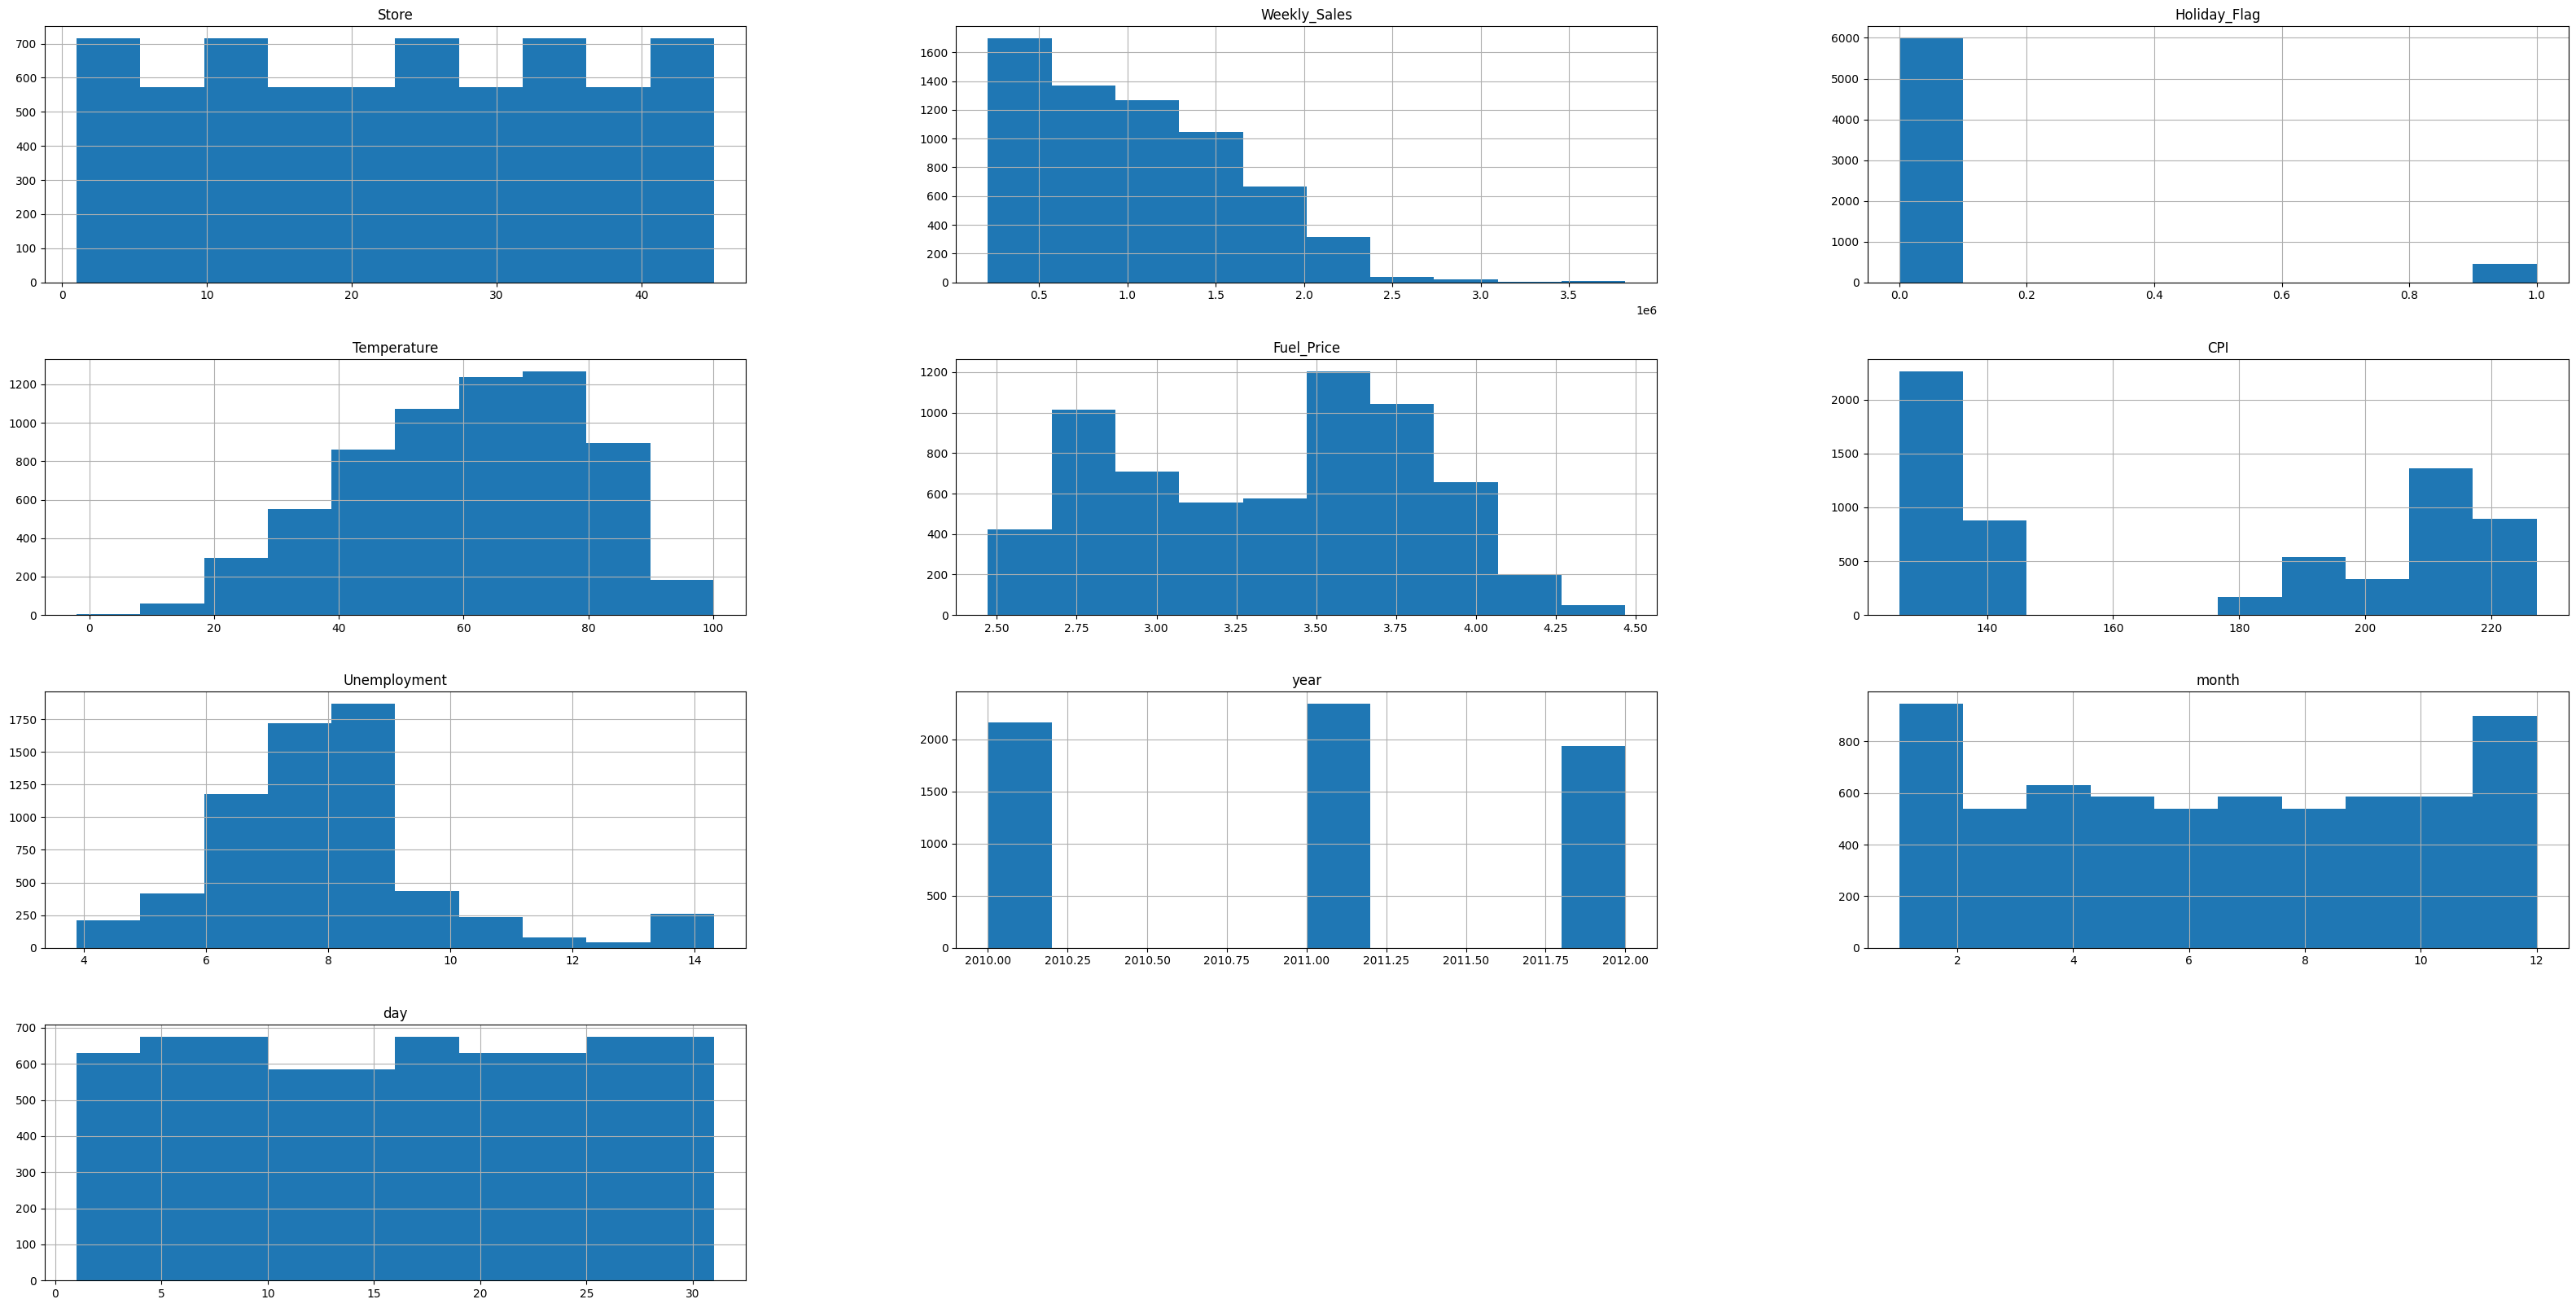

In [ ]:
df.hist(figsize=(40,20))

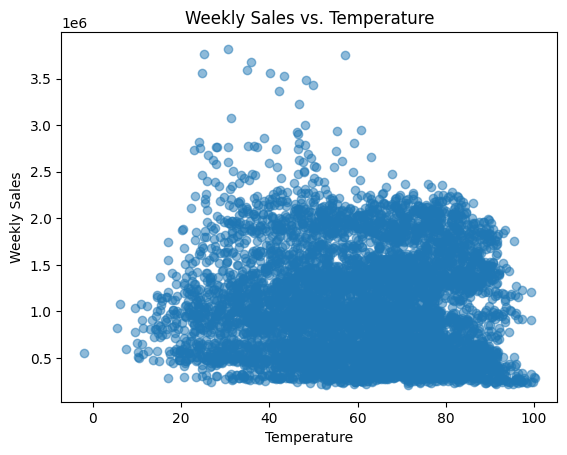

In [ ]:
#plot the Target variable
# Create a scatter plot of weekly sales against temperature
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)

# Add axis labels and a title
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature')

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

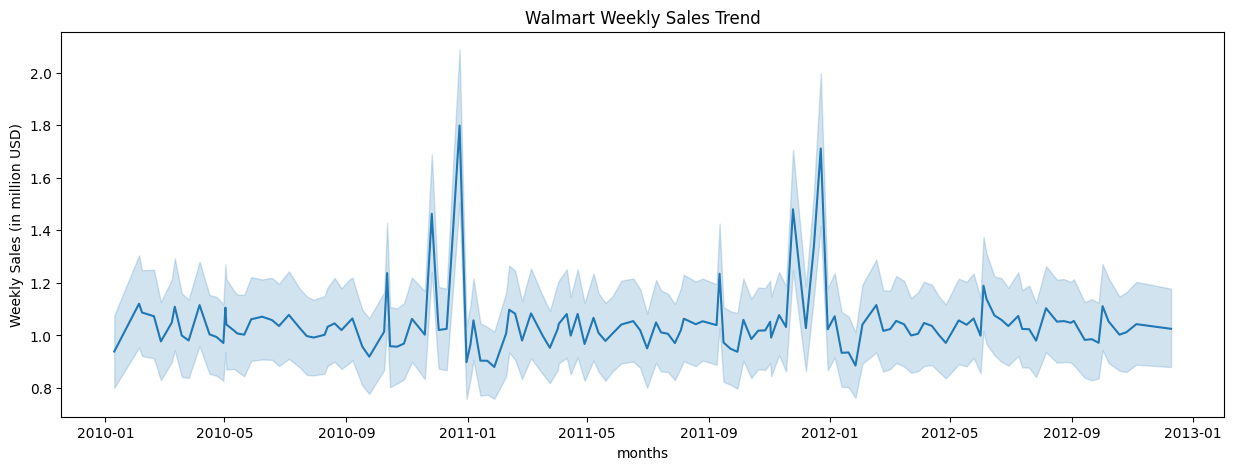

In [67]:
import seaborn as sns
# Weekly Sales over months
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Walmart Weekly Sales Trend')

plt.show

In [ ]:
df.drop(['Date'],axis=1,inplace=True)


In [36]:
df1

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,day,Store_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,1,...,0,0,1,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,1,...,0,0,0,0,0,0,0,0,0,1
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,19,1,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,26,1,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,28,0,...,0,0,0,0,0,0,1,0,0,0
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,0,...,0,0,1,0,0,0,0,0,0,0
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,0,...,0,0,0,0,0,0,0,0,0,1
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,19,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Separate the Date column from x
x = df1.drop(['Weekly_Sales', 'Date', 'day'], axis=1)


# Scale the numerical columns
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(x)

# Concatenate the scaled numerical columns and the Date column back into a dataframe
scaled_df1 = pd.DataFrame(scaled_df1, columns=x.columns)


# Split the data into train and test sets
y = df1['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(scaled_df1, y, test_size=0.2, random_state=50)

In [39]:
import statsmodels.formula.api as smf
# Fit a linear regression model using the formula API of statsmodels
model = smf.ols('Weekly_Sales ~ Temperature + Fuel_Price + CPI + Unemployment', data=df1).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.21e-33
Time:                        01:36:09   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.744e+06   7.96e+04     21.918   

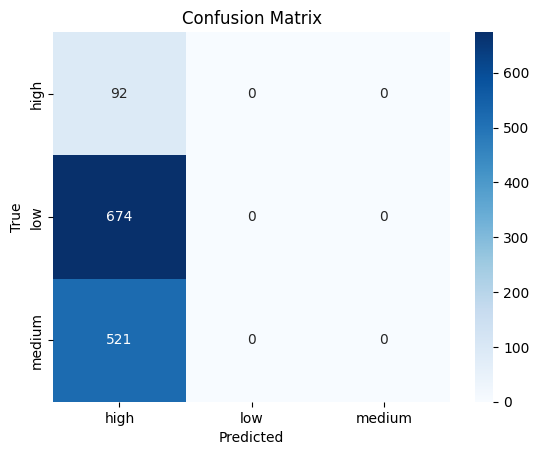

In [40]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

# Convert continuous values to categorical ones
y_test_categorical = pd.cut(y_test, bins=[0, 1000000, 2000000, 3000000], labels=['low', 'medium', 'high'])
lb = LabelBinarizer()
y_test_categorical = lb.fit_transform(y_test_categorical)

# Compute confusion matrix for the test set
y_pred_multiclass = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred_multiclass.reshape(-1,1).argmax(axis=1))

# Create heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# Define a linear regression model
clf = LinearRegression()

# Fit the model on the training data
clf.fit(x_train, y_train)

# Predict the target variable of the testing set
y_pred = clf.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print('MSE:', mse)
print("R2 score: ", r)

MSE: 19737724146.73801
R2 score:  0.9373856381432798


In [42]:
from sklearn.tree import DecisionTreeRegressor
#Set a decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg 

DecisionTreeRegressor(max_depth=3)

In [76]:
#create a decision tree regressor
tree_reg.fit(x_train, y_train)

# Predict the output for the test data
y_pred = tree_reg.predict(x_test)

# perorm a model using mean squared error for decision tree 
mse2 = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("MeSE: ", mse2)
print("R2 score: ", r2)

MeSE:  237113896528.95883
R2 score:  0.24779902646603702


In [77]:
from sklearn.ensemble import RandomForestRegressor
### Set and perform a random forest for our walmart data
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

# Predict the output for the test data
y_pred = rf_reg.predict(x_test)

# Evaluate the performance of the model using mean squared error and R2 score
mse3 = mean_squared_error(y_test, y_pred)
r3 = r2_score(y_test, y_pred)
print("MSE: ", mse3)
print("R2 score: ", r3)

MSE:  22392294015.59101
R2 score:  0.9289644951023392


In [78]:
# create data as dictionary
data = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MSE': [mse, mse2, mse3],
    'R2_Score': [r, r2, r3]
}

# create a DataFrame from the data
Table = pd.DataFrame(data)

# print the DataFrame
print(Table)

                     Model           MSE  R2_Score
0        Linear Regression  1.973772e+10  0.937386
1  Decision Tree Regressor  2.371139e+11  0.247799
2  Random Forest Regressor  2.239229e+10  0.928964
